<h1 style="text-align:center; font-size:200%;">Deep Learning ANN</h1>
<h4 style="text-align:left;">Réaliser par : DAGHMOUMI Marouan </h4>
<h4 style="text-align:left;">Encadrer par : Pr. Faouzi TAYALATI</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder

In [2]:
# Load the data
data = pd.read_csv('machine_performance_random_1000_dataset_V2.csv')

<h4 style="text-align:left;">Data Analysis </h4>

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Machine,Temps ouverture (heures),Arret planifie (heures),Duree de panne (heures),Ecart de cadence (heures),Nombre de piece bonne,Cadence de production (piees/minute)
0,M1,15,1.156961,1.099763,0.662674,757,60
1,M2,15,1.211035,0.855025,0.317592,695,51
2,M3,15,2.136547,1.071865,0.429608,872,64
3,M4,16,1.359729,1.190878,0.409812,653,53
4,M1,16,1.540807,0.630224,0.180200,648,51


In [4]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Machine                               1000 non-null   object 
 1   Temps ouverture (heures)              1000 non-null   int64  
 2   Arret planifie (heures)               1000 non-null   float64
 3   Duree de panne (heures)               1000 non-null   float64
 4   Ecart de cadence (heures)             1000 non-null   float64
 5   Nombre de piece bonne                 1000 non-null   int64  
 6   Cadence de production (piees/minute)  1000 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


In [5]:
# Check for missing values
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Machine                                 0
Temps ouverture (heures)                0
Arret planifie (heures)                 0
Duree de panne (heures)                 0
Ecart de cadence (heures)               0
Nombre de piece bonne                   0
Cadence de production (piees/minute)    0
dtype: int64

In [6]:
# Basic statistical summary of the data
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,Temps ouverture (heures),Arret planifie (heures),Duree de panne (heures),Ecart de cadence (heures),Nombre de piece bonne,Cadence de production (piees/minute)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.040000,1.761091,1.004005,0.400539,743.682000,57.298000
std,0.813057,0.441670,0.284758,0.173728,86.111754,4.362824
min,15.000000,1.000078,0.501277,0.100648,600.000000,50.000000
25%,15.000000,1.371877,0.761208,0.251688,665.750000,53.000000
50%,16.000000,1.760350,1.004638,0.397701,739.000000,57.000000
75%,17.000000,2.150677,1.254102,0.547564,818.000000,61.000000
max,17.000000,2.498946,1.498743,0.698356,899.000000,64.000000


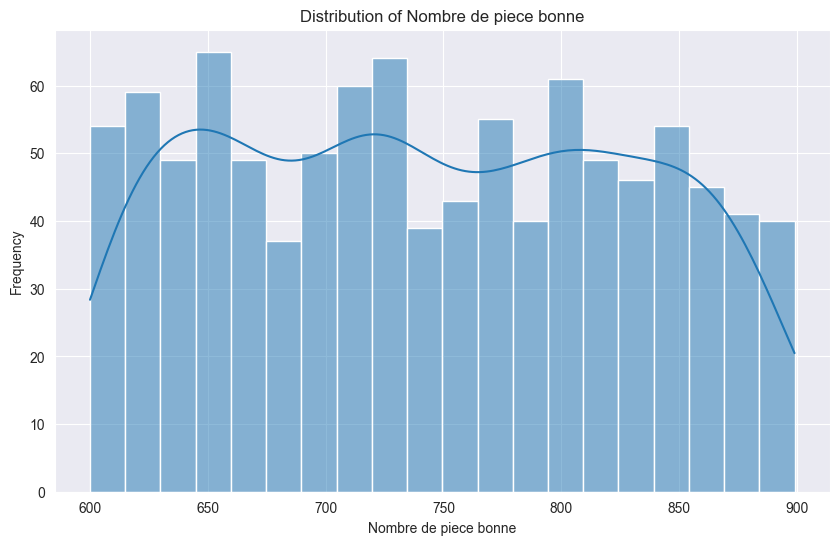

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Nombre de piece bonne'], kde=True, bins=20)
plt.title('Distribution of Nombre de piece bonne')
plt.xlabel('Nombre de piece bonne')
plt.ylabel('Frequency')
plt.show()

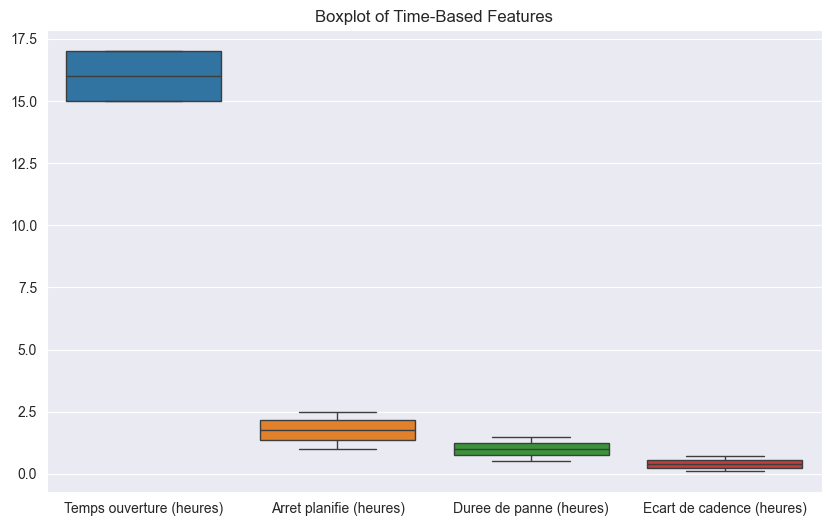

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Temps ouverture (heures)', 'Arret planifie (heures)', 'Duree de panne (heures)', 'Ecart de cadence (heures)']])
plt.title('Boxplot of Time-Based Features')
plt.show()

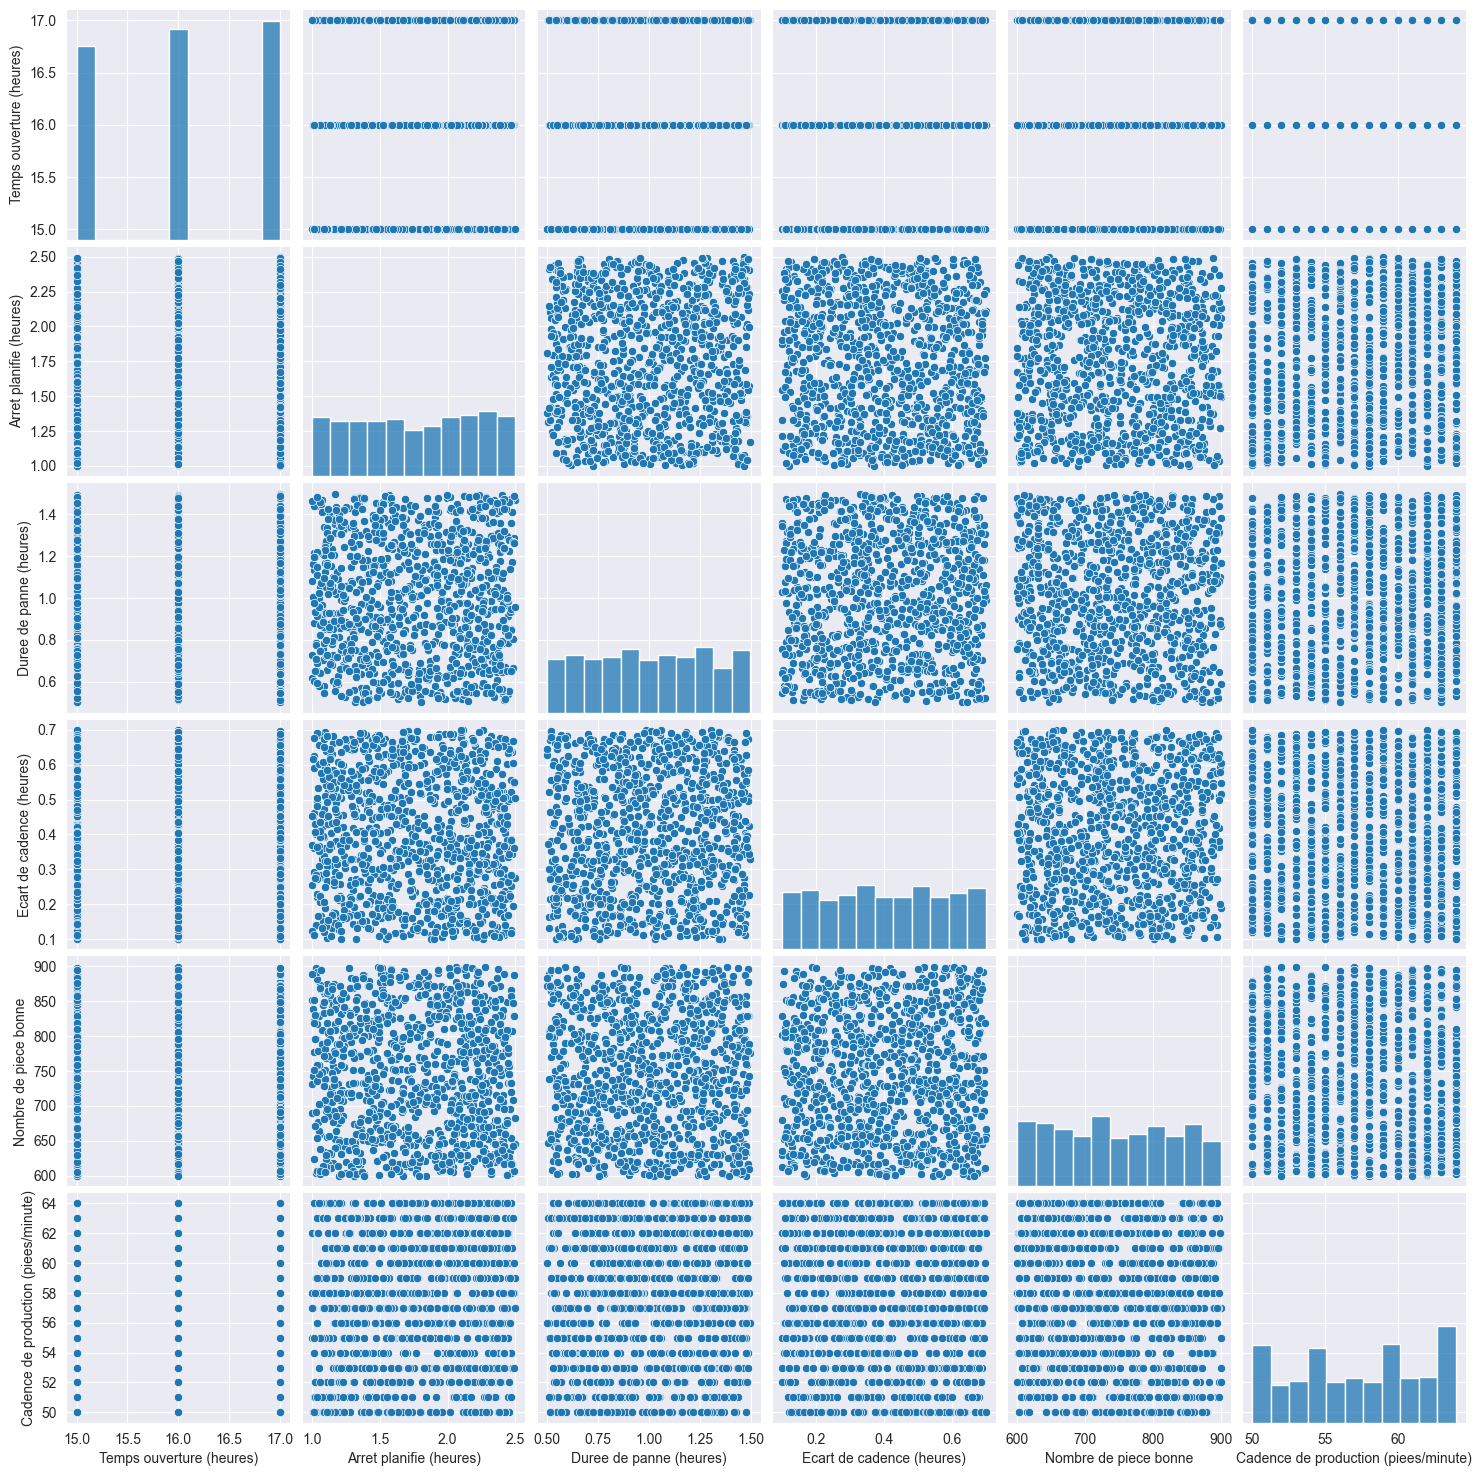

In [10]:
sns.pairplot(data)
plt.show()

<h4 style="text-align:left;">Partie 1 : Analyse industrielle et modélisation </h4>

In [11]:
# Calcul des indicateurs
data['Temps_de_fonctionnement'] = data['Temps ouverture (heures)'] - data['Arret planifie (heures)'] - data['Duree de panne (heures)']
data['Temps_requis'] = data['Temps_de_fonctionnement'] - data['Ecart de cadence (heures)']
data['Temps_net'] = data['Temps_requis']
data['Temps_utile'] = data['Nombre de piece bonne'] / (data['Cadence de production (piees/minute)'] * 60) 
data['TRS'] = (data['Temps_utile'] / data['Temps_de_fonctionnement']) * 100 

In [12]:
data

,Machine,Temps ouverture (heures),Arret planifie (heures),Duree de panne (heures),Ecart de cadence (heures),Nombre de piece bonne,Cadence de production (piees/minute),Temps_de_fonctionnement,Temps_requis,Temps_net,Temps_utile,TRS
0,M1,15,1.156961,1.099763,0.662674,757,60,12.743276,12.080601,12.080601,0.210278,1.650108
1,M2,15,1.211035,0.855025,0.317592,695,51,12.933940,12.616348,12.616348,0.227124,1.756032
2,M3,15,2.136547,1.071865,0.429608,872,64,11.791588,11.361981,11.361981,0.227083,1.925808
3,M4,16,1.359729,1.190878,0.409812,653,53,13.449393,13.039580,13.039580,0.205346,1.526804
4,M1,16,1.540807,0.630224,0.180200,648,51,13.828969,13.648769,13.648769,0.211765,1.531312
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M4,15,1.923029,1.112017,0.341187,857,54,11.964955,11.623768,11.623768,0.264506,2.210674
996,M1,15,1.115517,0.727697,0.324885,695,50,13.156786,12.831901,12.831901,0.231667,1.760815
997,M2,15,2.235595,1.189442,0.235546,876,59,11.574963,11.339417,11.339417,0.247458,2.137870
998,M3,15,1.090204,1.094100,0.649350,681,57,12.815695,12.166345,12.166345,0.199123,1.553742


In [13]:
encode = LabelEncoder()
data['Machine'] = encode.fit_transform(data['Machine'])

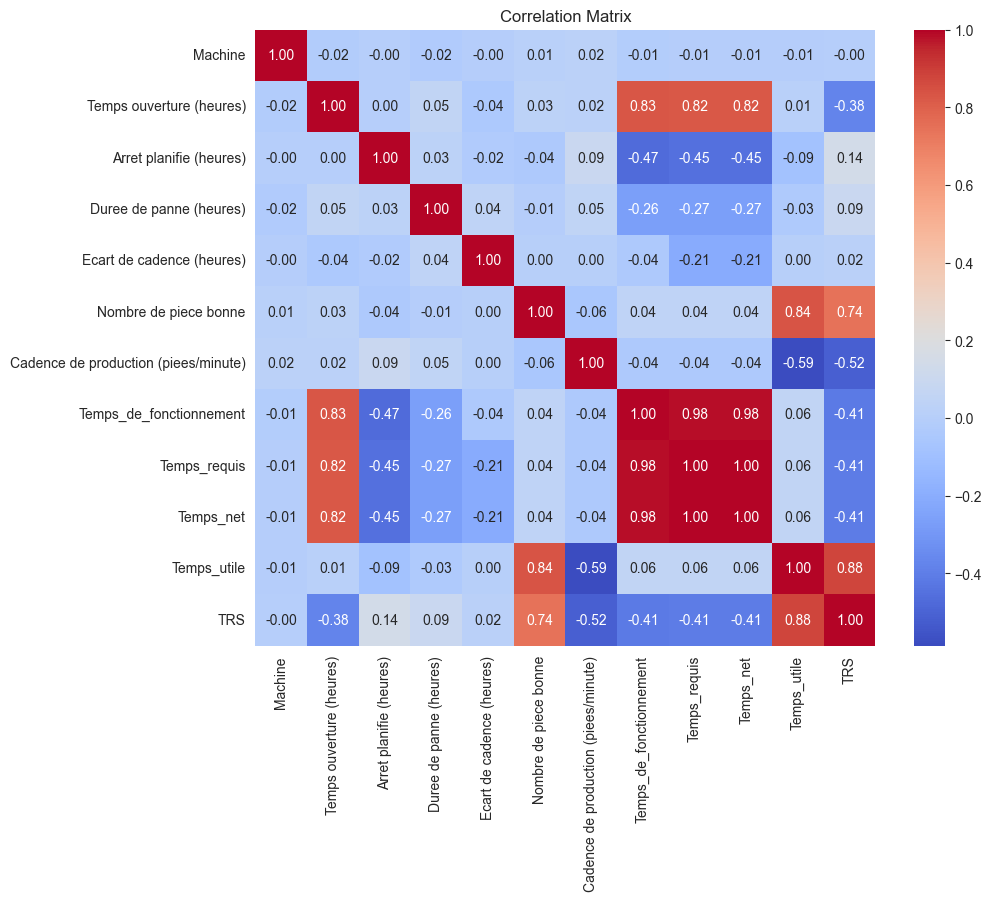

In [17]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
data = data.drop(['Temps ouverture (heures)','Arret planifie (heures)','Duree de panne (heures)','Ecart de cadence (heures)','Nombre de piece bonne','Cadence de production (piees/minute)'], axis=1)

In [19]:
data

,Machine,Temps_de_fonctionnement,Temps_requis,Temps_net,Temps_utile,TRS
0,0,12.743276,12.080601,12.080601,0.210278,1.650108
1,1,12.933940,12.616348,12.616348,0.227124,1.756032
2,2,11.791588,11.361981,11.361981,0.227083,1.925808
3,3,13.449393,13.039580,13.039580,0.205346,1.526804
4,0,13.828969,13.648769,13.648769,0.211765,1.531312
...,...,...,...,...,...,...
995,3,11.964955,11.623768,11.623768,0.264506,2.210674
996,0,13.156786,12.831901,12.831901,0.231667,1.760815
997,1,11.574963,11.339417,11.339417,0.247458,2.137870
998,2,12.815695,12.166345,12.166345,0.199123,1.553742


<h4 style="text-align:left;">Partie 2 : Intelligence Artificielle avec application d’un ANN </h4>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
X = data.drop('TRS', axis=1)
y = data['TRS']

In [22]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
data

,Machine,Temps_de_fonctionnement,Temps_requis,Temps_net,Temps_utile,TRS
0,0,12.743276,12.080601,12.080601,0.210278,1.650108
1,1,12.933940,12.616348,12.616348,0.227124,1.756032
2,2,11.791588,11.361981,11.361981,0.227083,1.925808
3,3,13.449393,13.039580,13.039580,0.205346,1.526804
4,0,13.828969,13.648769,13.648769,0.211765,1.531312
...,...,...,...,...,...,...
995,3,11.964955,11.623768,11.623768,0.264506,2.210674
996,0,13.156786,12.831901,12.831901,0.231667,1.760815
997,1,11.574963,11.339417,11.339417,0.247458,2.137870
998,2,12.815695,12.166345,12.166345,0.199123,1.553742


In [24]:
# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
model = Sequential()

In [26]:
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))

/Users/marouandgh/IdeaProjects/Deep_learning/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.add(Dense(30, activation='relu'))

In [28]:
model.add(Dense(1, activation='linear')) 

In [29]:
# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
# Entraînement du modèle
model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

Epoch 1/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: 1.3620
Epoch 2/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.1456
Epoch 3/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0753
Epoch 4/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.0414
Epoch 5/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.0223
Epoch 6/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.0099
Epoch 7/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.0041
Epoch 8/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.0022
Epoch 9/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.0014    
Epoch 10/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0011
Epoch 11/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 8.5066e-04
Epoch 12/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 7.4924e-04
Epoch 13/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9114e-04
Epoch 14/300
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6846e-04
Epoch 15/300
80/80 ━━━━━━━━

In [32]:
# Évaluation du modèle
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step


In [33]:
print("Prédictions du modèle ANN : ")
y_pred

Prédictions du modèle ANN : 


array([[1.2374135],
       [1.4219611],
       [1.60437  ],
       [1.7855396],
       [1.4533916],
       [1.9008651],
       [1.1632601],
       [1.4716005],
       [1.4760537],
       [1.6450696],
       [2.1034951],
       [1.9361076],
       [1.5992904],
       [1.5455619],
       [1.3523227],
       [2.0711944],
       [2.2082002],
       [1.588959 ],
       [1.6149179],
       [1.3596251],
       [1.0354555],
       [1.4281499],
       [1.101741 ],
       [1.899698 ],
       [1.3852271],
       [1.9851689],
       [1.7461352],
       [1.4981691],
       [1.8086549],
       [1.951083 ],
       [2.3606427],
       [1.4955697],
       [1.098341 ],
       [1.240609 ],
       [1.3318707],
       [1.6171274],
       [2.0747318],
       [1.7371931],
       [1.5048676],
       [1.5211369],
       [1.6263638],
       [1.7603203],
       [1.6798562],
       [1.690547 ],
       [1.5288261],
       [1.4983754],
       [1.99723  ],
       [1.7919838],
       [1.9283223],
       [1.8763592],


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R²: {r2}")

MSE: 5.4014323290076406e-05, R²: 0.9992397035813432


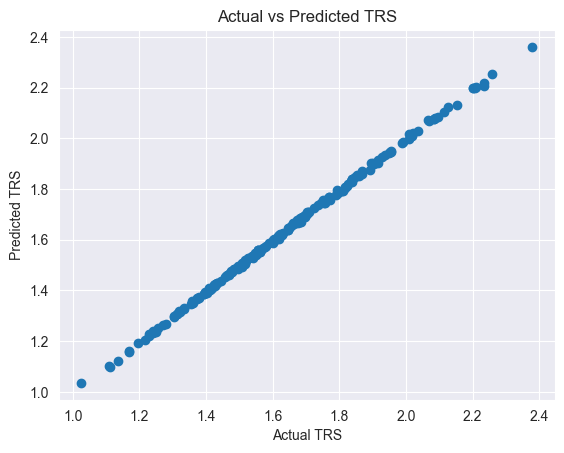

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TRS')
plt.ylabel('Predicted TRS')
plt.title('Actual vs Predicted TRS')
plt.show()